In [63]:
import pandas as pd
df=pd.read_csv('/content/sample_data/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [64]:
df.shape
df=df.iloc[:,8:11]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90023 entries, 0 to 90022
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       90021 non-null  float64
 1   y       90021 non-null  float64
 2   z       90021 non-null  float64
dtypes: float64(3)
memory usage: 2.1 MB


In [66]:
df.isnull().sum()

x    2
y    2
z    2
dtype: int64

In [67]:
df.nunique()

x    554
y    552
z    375
dtype: int64

In [68]:
df.drop_duplicates(inplace=True)
df.shape

(37892, 3)

In [69]:
df_ohe=pd.get_dummies(df)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37892 entries, 0 to 71569
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       37891 non-null  float64
 1   y       37891 non-null  float64
 2   z       37891 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


In [70]:
df_ohe.head()

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75


In [71]:
df_ohe.isnull().sum()
df_ohe.fillna(df_ohe.median(),inplace=True)
df_ohe.isnull().sum()

x    0
y    0
z    0
dtype: int64

In [21]:
df_ohe.drop('Unnamed: 0',axis=1,inplace=True)

In [72]:
df_ohe.info()
df_ohe.drop(['cut_5.01','color_5.04','clarity_3.02'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 37892 entries, 0 to 71569
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       37892 non-null  float64
 1   y       37892 non-null  float64
 2   z       37892 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


KeyError: "['cut_5.01', 'color_5.04', 'clarity_3.02'] not found in axis"

In [75]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df_ohe,test_size=0.3,random_state=7)

In [76]:
X_train.shape,X_test.shape

((26524, 3), (11368, 3))

In [77]:
from sklearn.cluster import KMeans
mykmeans=KMeans(5 ,random_state=7)


In [78]:
mykmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=7)

In [79]:
cluster_nos=mykmeans.predict(X_test)

In [80]:
X_test.iloc[0,:]

x    5.83
y    5.80
z    3.44
Name: 70248, dtype: float64

In [81]:
cluster_nos[0]

0

In [82]:
inertia_values = []
for k in range(2,11):
    mykmeans = KMeans(k,random_state=7)
    mykmeans.fit(X_train)
    inertia_values.append(mykmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [83]:
inertia_values

[26961.83498505191,
 14528.63926621622,
 9593.030777423932,
 6961.385499086637,
 5190.652498196849,
 3592.554743945383,
 3066.0780213939597,
 2293.3555104186535,
 1917.2279861325947]

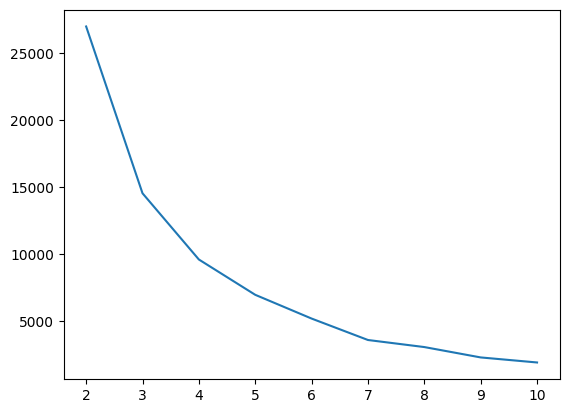

In [84]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)), inertia_values)